<a href="https://colab.research.google.com/github/myutiee/3AI1_Mutia_0110224131/blob/main/Praktikum_mandiri_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum mandiri
###1. Loading Dataset

In [12]:
pip install kaggle

In [13]:
kaggle = '/content/kaggle.json'

In [14]:
!mkdir -p ~/.kaggle
!cp {kaggle} ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d olafkrastovski/handwritten-digits-0-9

Dataset URL: https://www.kaggle.com/datasets/olafkrastovski/handwritten-digits-0-9
License(s): CC0-1.0
handwritten-digits-0-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
from zipfile import ZipFile
import os
file_name = "handwritten-digits-0-9.zip"

extract_folder = "dataset"
os.makedirs(extract_folder, exist_ok=True)

with ZipFile(file_name, 'r') as zip:
  zip.extractall(extract_folder)
  print('done')

done


In [17]:
data_0 = os.listdir('/content/dataset/0')
data_1 = os.listdir('/content/dataset/1')
data_2 = os.listdir('/content/dataset/2')
data_3 = os.listdir('/content/dataset/3')
data_4 = os.listdir('/content/dataset/4')
data_5 = os.listdir('/content/dataset/5')
data_6 = os.listdir('/content/dataset/6')
data_7 = os.listdir('/content/dataset/7')
data_8 = os.listdir('/content/dataset/8')
data_9 = os.listdir('/content/dataset/9')

In [18]:
len(data_0)

2236

###2. Preprocessing Data

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Added Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.utils import shuffle

###3. Ubah data gambar menjadi numerik

In [20]:
data = []
labels = []

base_path = "/content/dataset"

for label in range(10):
    folder_path = os.path.join(base_path, str(label))

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # baca gambar grayscale
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # resize (jaga-jaga)
        img = cv2.resize(img, (28, 28))

        # normalisasi 0–1
        img = img / 255.0

        # flatten
        img = img.flatten()

        data.append(img)
        labels.append(label)

In [21]:
X = np.array(data)
y = np.array(labels)

print("Shape X:", X.shape)
print("Shape y:", y.shape)


Shape X: (21555, 784)
Shape y: (21555,)


##Split Data


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Arsitektur model MLP yang digunakan

In [23]:
model = Sequential()

# Increased neurons and added dropout
model.add(Dense(256, activation='relu', input_shape=(784,)))
#model.add(Dropout(0.3)) # Dropout layer to prevent overfitting
model.add(Dense(128, activation='relu')) # Another hidden layer with more neurons
#model.add(Dropout(0.3)) # Another dropout layer
model.add(Dense(64, activation='relu')) # Original hidden layer
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,
    restore_best_weights=True
)

 Proses training dan evaluasi model

In [26]:
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

#buat agar hasik acuransinya tinggi

Epoch 1/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.1051 - loss: 2.3391 - val_accuracy: 0.1711 - val_loss: 2.2665
Epoch 2/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1513 - loss: 2.2386 - val_accuracy: 0.1960 - val_loss: 2.1270
Epoch 3/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1997 - loss: 2.1222 - val_accuracy: 0.2375 - val_loss: 2.0805
Epoch 4/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2558 - loss: 2.0294 - val_accuracy: 0.2894 - val_loss: 1.9337
Epoch 5/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3154 - loss: 1.9149 - val_accuracy: 0.3636 - val_loss: 1.8118
Epoch 6/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3567 - loss: 1.8384 - val_accuracy: 0.3540 - val_loss: 1.8751
Epoch 7/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3821 - loss: 1.8020 - val_accuracy: 0.4477 - val_loss: 1.6510
Epoch 8/150
432/432 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4205 - loss: 1.6979 - val_acc

### 1. Akurasi dan Loss pada Data Uji

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6233 - loss: 1.1211
Test Accuracy: 0.6200417280197144
Test Loss: 1.134266972541809


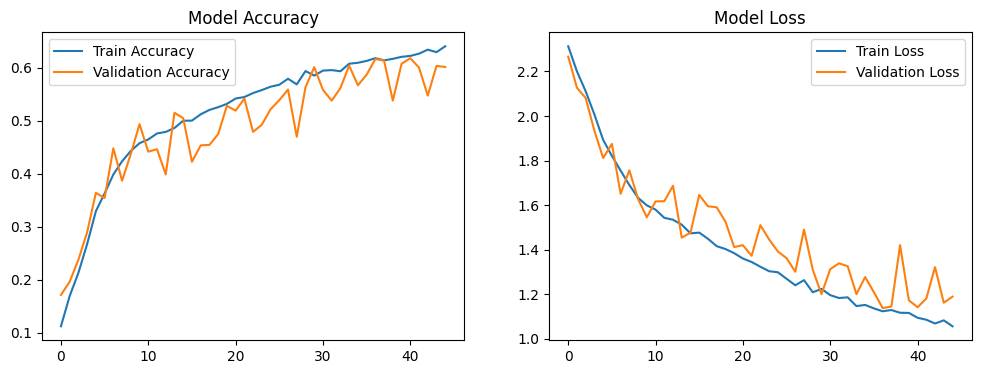

In [32]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

### 3. Classification Report

In [30]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

class_names = [str(i) for i in range(10)]

report = classification_report(y_test_labels, y_pred, target_names=class_names)
print(report)

135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       447
           1       0.73      0.70      0.72       448
           2       0.67      0.72      0.69       447
           3       0.53      0.64      0.58       441
           4       0.57      0.61      0.59       436
           5       0.56      0.52      0.54       425
           6       0.60      0.71      0.65       424
           7       0.60      0.63      0.62       423
           8       0.52      0.37      0.43       417
           9       0.61      0.51      0.55       403

    accuracy                           0.62      4311
   macro avg       0.62      0.62      0.61      4311
weighted avg       0.62      0.62      0.62      4311



### 4. Confusion Matrix

135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


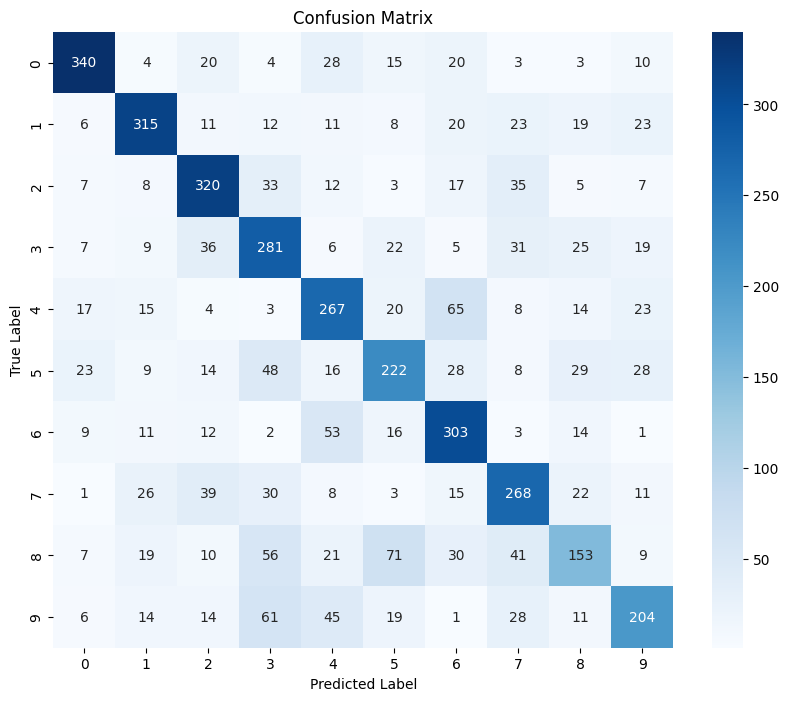

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions from the model
y_pred_raw = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_raw, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()